In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Importing the dataset
df= pd.read_csv("Target_Population.csv")
df.head()

,Years,Target Population
0,2011,10543289
1,2012,10728970
2,2013,10902433
3,2014,11088234
4,2015,11250013


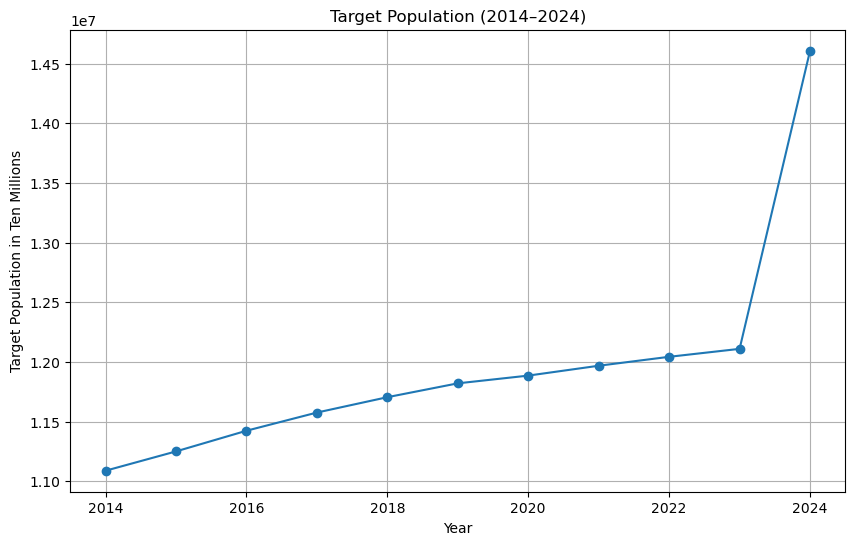

In [5]:
# Filter data from 2014 to 2024
df_filtered = df[(df["Years"] >= 2014) & (df["Years"] <= 2024)]

# Plot
plt.figure(figsize=(10,6))
plt.plot(df_filtered["Years"], df_filtered["Target Population"], marker="o")
plt.title("Target Population (2014–2024)")
plt.xlabel("Year")
plt.ylabel("Target Population in Ten Millions")
plt.grid(True)
plt.show()

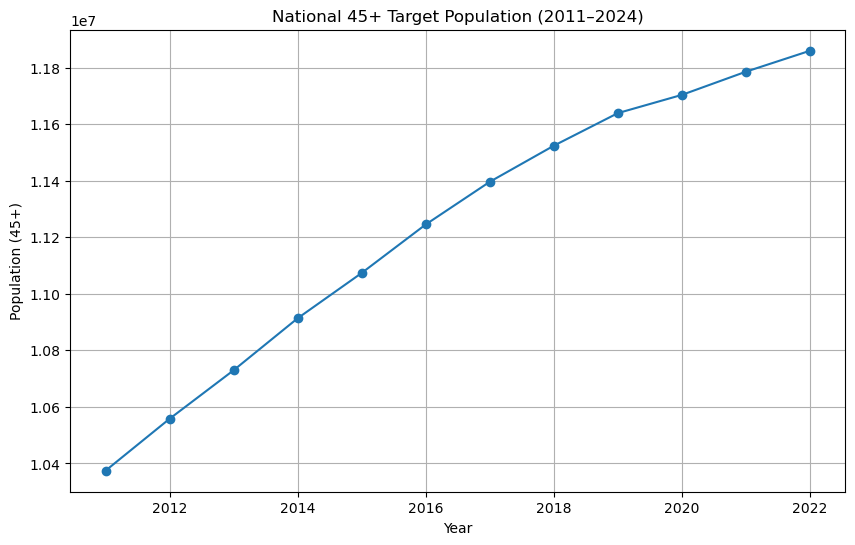

(   Year       Value
 0  2011  10374387.0
 1  2012  10557992.0
 2  2013  10729707.0
 3  2014  10913577.0
 4  2015  11073824.0,
                City      Value
 0        Birmingham  2229089.0
 1  Northamptonshire  1881210.0
 2   North Yorkshire  1815332.0
 3             Leeds  1730356.0
 4          Cornwall  1630670.0
 5          Somerset  1622817.0
 6     County Durham  1428099.0
 7   Buckinghamshire  1394138.0
 8         Wiltshire  1363952.0
 9         Sheffield  1278342.0)

In [8]:
df_city = pd.read_csv("Target_population_city.csv")
# Make a copy with cleaned column names
df_city_clean = df_city.rename(columns={"Attribute": "Year"}).copy()

# Drop missing values for now (later we could impute if necessary)
df_city_clean = df_city_clean.dropna(subset=["City", "Region Name", "Year", "Value"])

# Ensure Year is int
df_city_clean["Year"] = df_city_clean["Year"].astype(int)

# National-level summary (total 45+ population per year)
national_trend = df_city_clean.groupby("Year")["Value"].sum().reset_index()

# Region-level summary (per year)
region_trend = df_city_clean.groupby(["Year", "Region Name"])["Value"].sum().reset_index()

# Top cities overall (total across all years)
top_cities = df_city_clean.groupby("City")["Value"].sum().sort_values(ascending=False).head(10).reset_index()

import matplotlib.pyplot as plt

# Plot national trend
plt.figure(figsize=(10,6))
plt.plot(national_trend["Year"], national_trend["Value"], marker="o")
plt.title("National 45+ Target Population (2011–2024)")
plt.xlabel("Year")
plt.ylabel("Population (45+)")
plt.grid(True)
plt.show()

national_trend.head(), top_cities


<Figure size 1200x700 with 0 Axes>

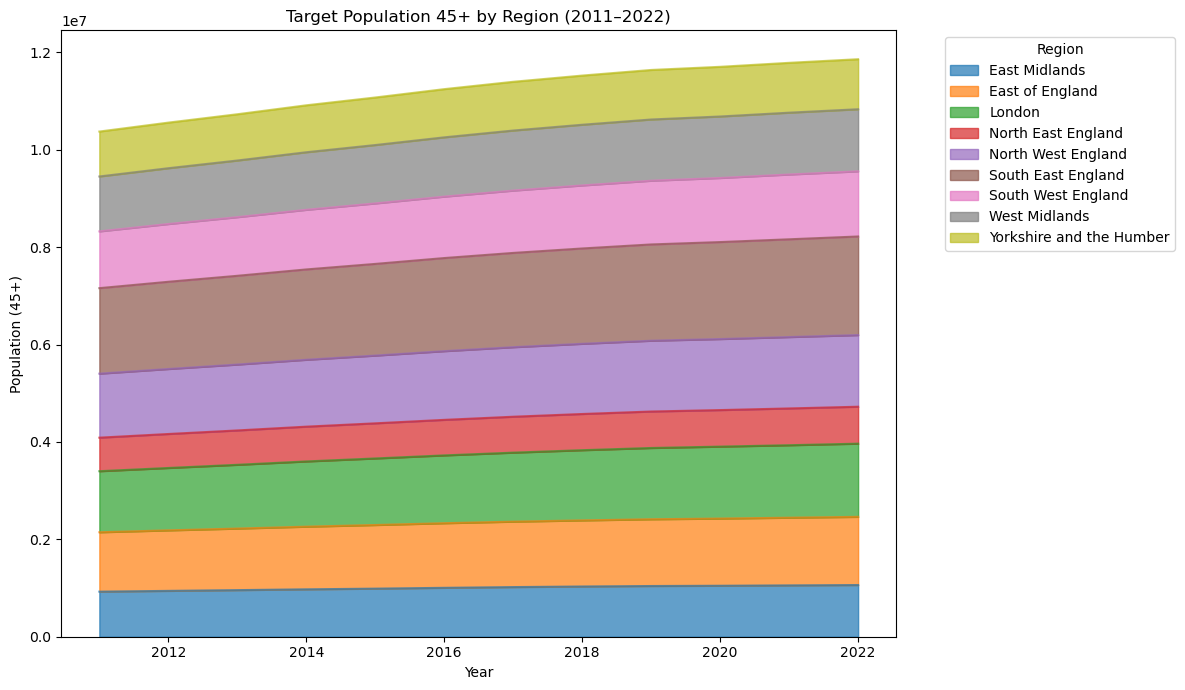

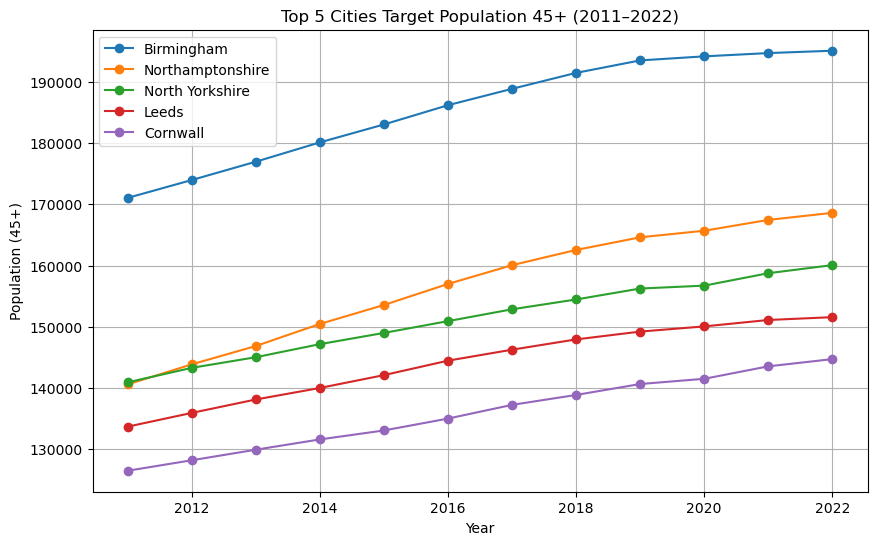

In [14]:
# Region-level trend plot (stacked area to show contribution by region over time)
region_pivot = region_trend.pivot(index="Year", columns="Region Name", values="Value").fillna(0)

plt.figure(figsize=(12,7))
region_pivot.plot.area(figsize=(12,7), alpha=0.7)
plt.title("Target Population 45+ by Region (2011–2022)")
plt.xlabel("Year")
plt.ylabel("Population (45+)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# City-level trend for top 5 cities
top5_cities = top_cities["City"].head(5).tolist()
city_trend = df_city_clean[df_city_clean["City"].isin(top5_cities)]
city_trend = city_trend.groupby(["Year", "City"])["Value"].sum().reset_index()

plt.figure(figsize=(10,6))
for city in top5_cities:
    subset = city_trend[city_trend["City"] == city]
    plt.plot(subset["Year"], subset["Value"], marker="o", label=city)

plt.title("Top 5 Cities Target Population 45+ (2011–2022)")
plt.xlabel("Year")
plt.ylabel("Population (45+)")
plt.legend()
plt.grid(True)
plt.show()


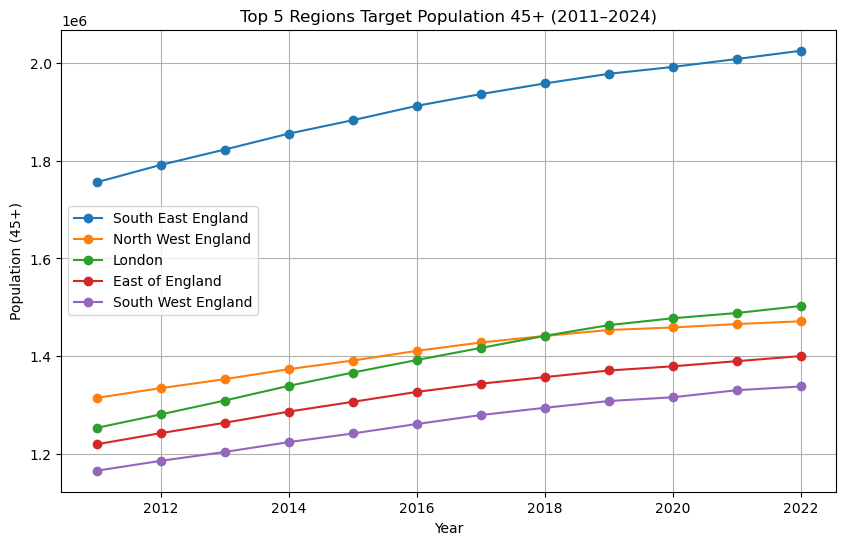

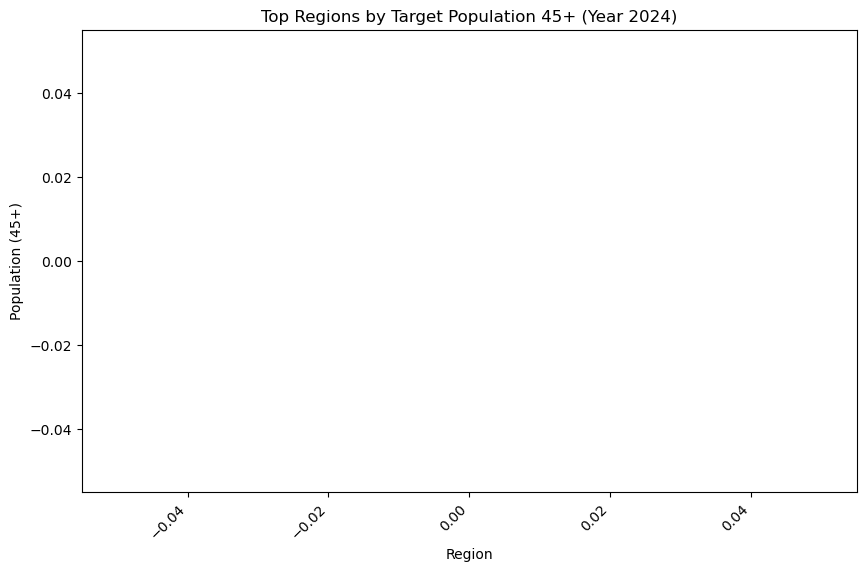

In [10]:
# Find top 5 regions by total population (2011–2024)
top_regions = region_trend.groupby("Region Name")["Value"].sum().sort_values(ascending=False).head(5).index.tolist()

# Filter for those top regions
region_trend_top5 = region_trend[region_trend["Region Name"].isin(top_regions)]

# Line plot: trends for top 5 regions
plt.figure(figsize=(10,6))
for region in top_regions:
    subset = region_trend_top5[region_trend_top5["Region Name"] == region]
    plt.plot(subset["Year"], subset["Value"], marker="o", label=region)

plt.title("Top 5 Regions Target Population 45+ (2011–2024)")
plt.xlabel("Year")
plt.ylabel("Population (45+)")
plt.legend()
plt.grid(True)
plt.show()

# Bar chart: top regions in 2024
region_2024 = region_trend[region_trend["Year"] == 2024].sort_values("Value", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(region_2024["Region Name"], region_2024["Value"])
plt.title("Top Regions by Target Population 45+ (Year 2024)")
plt.xlabel("Region")
plt.ylabel("Population (45+)")
plt.xticks(rotation=45, ha="right")
plt.show()
